In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
import random
from tensorflow.keras.optimizers import SGD



In [5]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

ImportError: cannot import name 'Adam' from 'keras.optimizers' (C:\Users\Abhijeet\Anaconda3\lib\site-packages\keras\optimizers.py)

In [6]:
# Loading Dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print(X_train.shape)


(50000, 32, 32, 3)


In [7]:
print(X_test.shape)    ##### We have 50000 training Data and 10000 test data


(10000, 32, 32, 3)


In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_dict = dict({0:'airplane', 1:'automobile', 2:'bird', 3:'cat',4: 'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'})


In [9]:
num_classes = y_train[:10]
num_classes

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)    # We dont need it in 2D so we convert to 1D (We need 1st dimension so we use -1 and to flatten it we leave empty)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


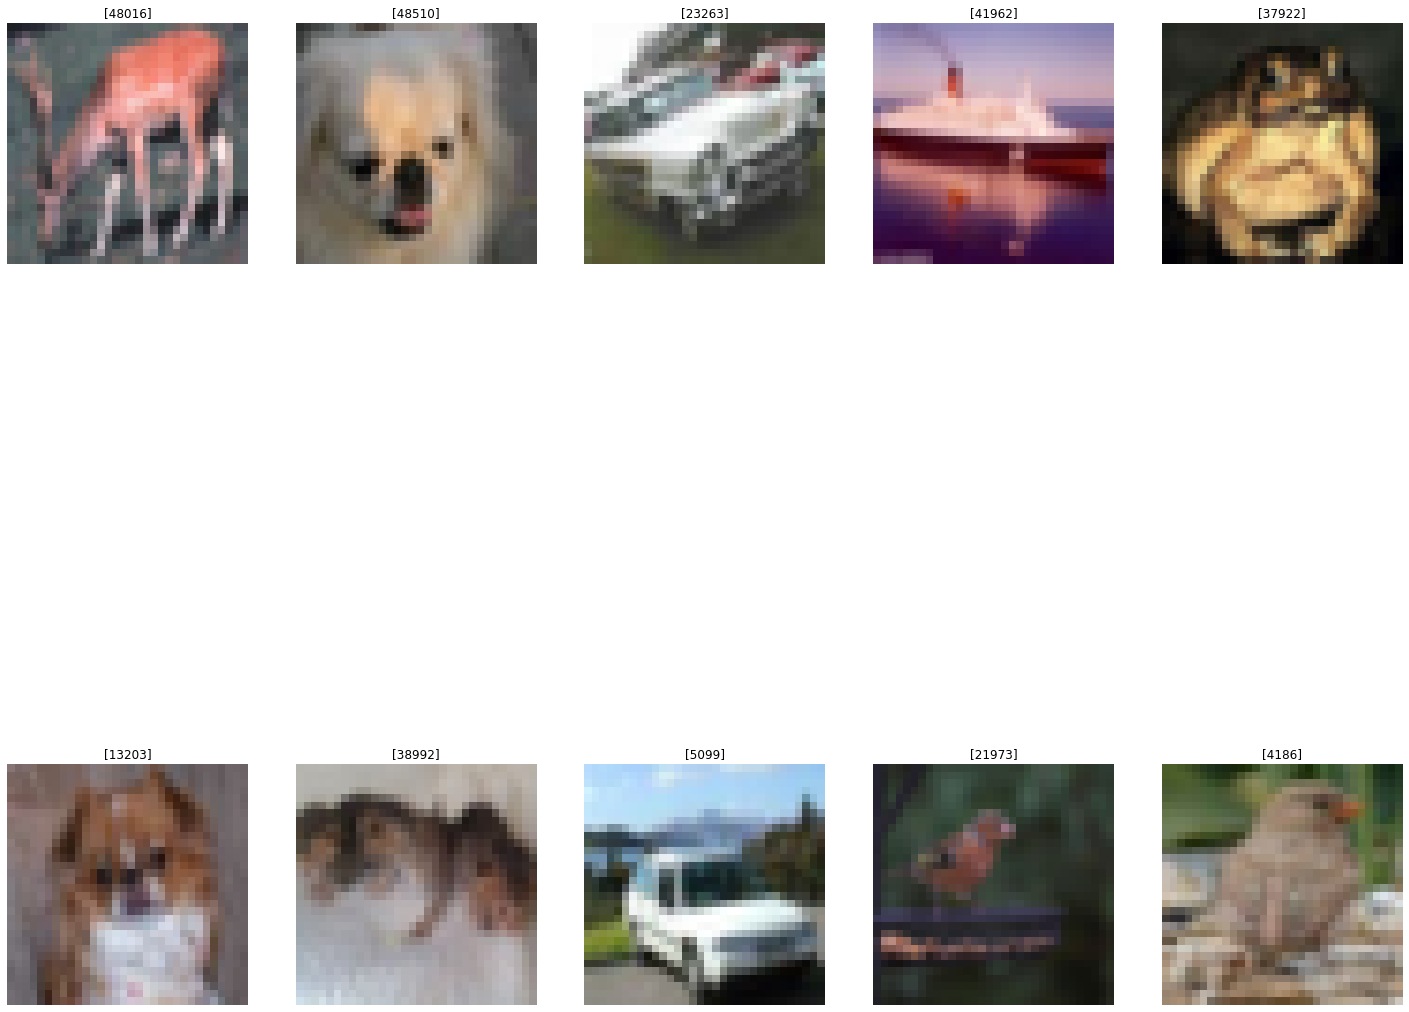

In [12]:
fig,axes = plt.subplots(2, 5, figsize=(25,25))  
axes=axes.reshape(-1)

for i in np.arange(0,2*5):   
    index=np.random.randint(0,len(X_train)) #Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title([index]) #Prints labels on top of the picture
    axes[i].axis('off')
 


In [13]:
X_train[0]   # As the data is not normalized we have to narmalize it

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
# Normalizing the Data 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train[0]    # Data is normalized

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
# Creating CNN model
# We are using 2 layers Convolution (Detecting the feature) 
#filter = detects different feature
# kerneal size = we use 3*3 filter (matrix/ box)
# Relu it give o/p 0 to 1 and impart non linearity. Ctivation fn gives o/p of the node to given input.
# Adam gives good accuracy
#
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [17]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

C:\Users\Abhijeet\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4482 - accuracy: 0.4812
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1115 - accuracy: 0.6119
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9866 - accuracy: 0.6565
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9001 - accuracy: 0.6885
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8397 - accuracy: 0.7100
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7796 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7292 - accuracy: 0.7475
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6871 - accuracy: 0.7609
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6511 - accuracy: 0.7730
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [21]:
scores = cnn.evaluate(X_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 70.22%
